# Using Louvain to find communities in graphs

In [1]:
from sknetwork.clustering import Louvain
from sknetwork.toy_graphs import karate_club_graph
from networkx import Graph, draw

In [2]:
adj = karate_club_graph()
adj

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

In [3]:
louvain = Louvain()
louvain.fit(adj)

Louvain(algorithm=GreedyModularity(resolution=1, tol=0.001, engine='numba'), agg_tol=0.001, max_agg_iter=-1, shuffle_nodes=False, verbose=False)

In [4]:
G = Graph(karate_club_graph())

In [5]:
colors = ['red','green','yellow','purple']

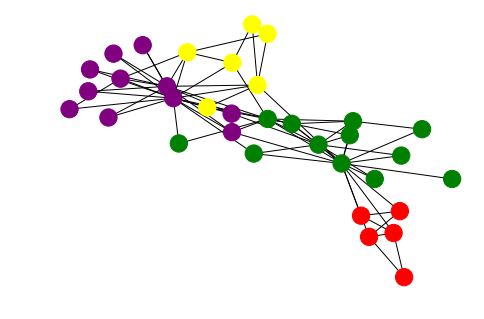

In [7]:
draw(G, node_color = [colors[louvain.labels_[i]] for i in range(34)])